<h1>United Kingdom Road Accidents Data Analytics</h1>
<hr>

<h2>Harry Amante</h2>

In [1]:
import numpy as np 
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
road_acci_df = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
road_acci_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Descriptive Analysis</h2>

In [4]:
road_acci_df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h2>Checking Null values</h2>

In [5]:
road_acci_df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Filling up Null Values</h2>

In [6]:
road_acci_df['Latitude'].mean()

np.float64(52.553865761110956)

In [7]:
road_acci_df['Latitude'] = road_acci_df['Latitude'].fillna(road_acci_df['Latitude'].mean())
road_acci_df['Accident Date'] = road_acci_df['Accident Date'].fillna(road_acci_df['Accident Date'].mode()[0])
road_acci_df['Longitude'] = road_acci_df['Longitude'].fillna(road_acci_df['Longitude'].mean())
road_acci_df['Road_Surface_Conditions'] = road_acci_df['Road_Surface_Conditions'].fillna(road_acci_df['Road_Surface_Conditions'].mode()[0])
road_acci_df['Road_Type'] = road_acci_df['Road_Type'].fillna(road_acci_df['Road_Type'].mode()[0])
road_acci_df['Urban_or_Rural_Area'] = road_acci_df['Urban_or_Rural_Area'].fillna(road_acci_df['Urban_or_Rural_Area'].mode()[0])
road_acci_df['Weather_Conditions'] = road_acci_df['Weather_Conditions'].fillna(road_acci_df['Weather_Conditions'].mode()[0])

In [8]:
road_acci_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Changing Data Types</h2>

In [9]:
road_acci_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [10]:
road_acci_df['Index'] = road_acci_df['Index'].astype('category')
road_acci_df['Accident_Severity'] = road_acci_df['Accident_Severity'].astype('category')
road_acci_df['Accident Date'] = road_acci_df['Accident Date'].astype('category')
road_acci_df['Light_Conditions'] = road_acci_df['Light_Conditions'].astype('category')
road_acci_df['District Area'] = road_acci_df['District Area'].astype('category')
road_acci_df['Road_Surface_Conditions'] = road_acci_df['Road_Surface_Conditions'].astype('category')
road_acci_df['Road_Type'] = road_acci_df['Road_Type'].astype('category')
road_acci_df['Urban_or_Rural_Area'] = road_acci_df['Urban_or_Rural_Area'].astype('category')
road_acci_df['Weather_Conditions'] = road_acci_df['Weather_Conditions'].astype('category')
road_acci_df['Vehicle_Type'] = road_acci_df['Vehicle_Type'].astype('category')

In [11]:
road_acci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Explanatory Data Analysis(EDA)</h2>

<h2>1. What is the total accidents number rocorded in the UK road accidents datasets?</h2>

In [12]:
road_acci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Inight#1</h2>
<p>The total number of accidents recorded in the UK road accidents are 660679 .</p>

<hr>
<h2>2. What vehicles types has more accident recorded?</h2>

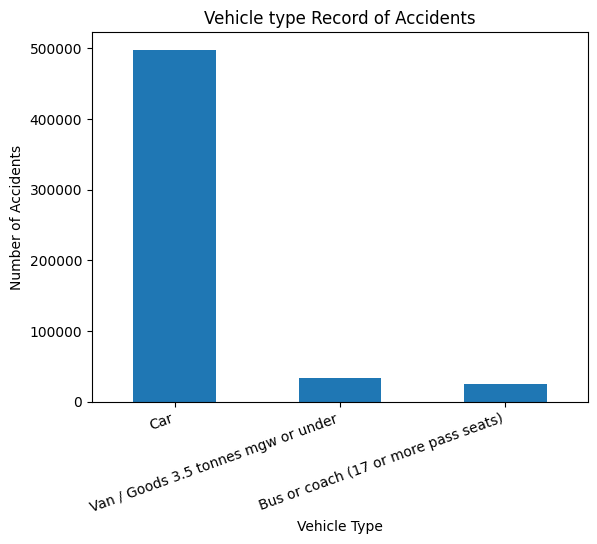

In [13]:

vehicle_acc = road_acci_df['Vehicle_Type'].value_counts().head(3)
vehicle_acc.plot(kind='bar')
plt.title('Vehicle type Record of Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=20, ha="right")
plt.show()

<h2>Insight#2</h2>
<p>Base on the reults the vehicles that has the most recorded accident is "CAR"</p>

<h2>3. Which District area is the most prone on vehicle accident?</h2>

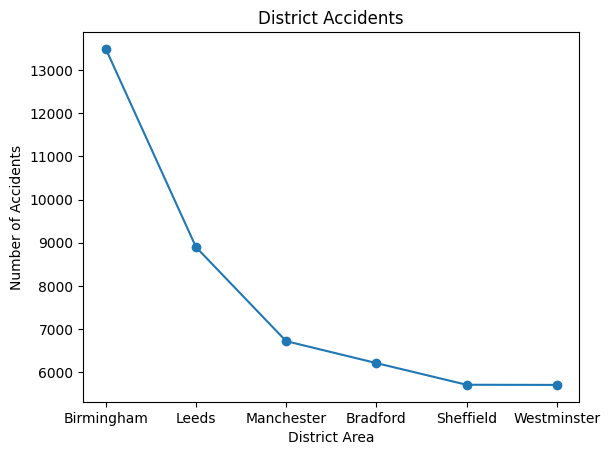

In [14]:
district = road_acci_df['District Area'].value_counts().head(6)
district.plot(marker='o')
plt.title('District Accidents')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.show()

<h2>Insight#3</h2>
<p>Base on the results the district area accident-prone is Birmingham with the record of 13491.</p>

<h2>4. During what weather condition and road surface conditions do accidents usually happen?</h2>

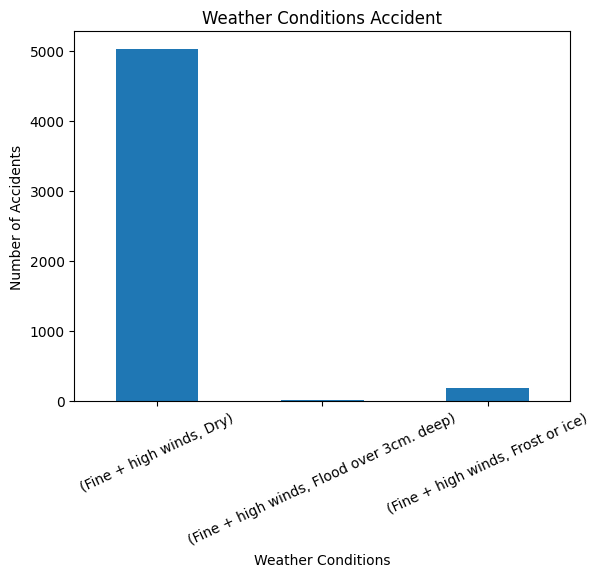

In [15]:
weather_surface_counts = road_acci_df.groupby(["Weather_Conditions", "Road_Surface_Conditions"]).size().head(3)
weather_surface_counts.plot(kind='bar')
plt.title('Weather Conditions Accident')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=25)
plt.show()

<h2>Insight#4</h2>
<p>Base on the results accidents usually happen when the weather conditions is "FINE NO WINDS" and the road surface conditions is "DRY".</p>

<h2>5. What is the average number of vehicles involved per accident?</h2>

In [16]:
round(road_acci_df['Number_of_Vehicles'].mean(),0)


np.float64(2.0)

<h2>Inight#5</h2>
<p>Base on the results the average number involve in accident is 2.</p>

<h2>6. What is the most common light condition  during accidents?</h2>

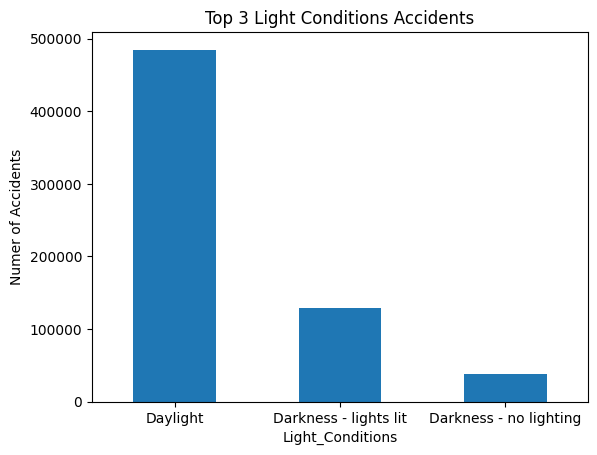

In [17]:
cmmn_light_con = road_acci_df['Light_Conditions'].value_counts().head(3)
cmmn_light_con.plot(kind='bar')
plt.title('Top 3 Light Conditions Accidents')
plt.ylabel('Numer of Accidents')
plt.xticks(rotation=0)
plt.show()

<h2>Insight#6</h2>
<p>The most common light conditions during accidents is "DAYLIGHT" with the total number of 484880 accidents .</p>

<h2>7. Which road type has the highest frequency of accidents?</h2>

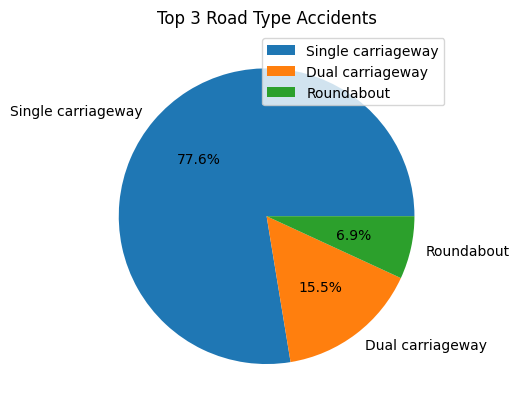

In [18]:
road_type_acci = road_acci_df['Road_Type'].value_counts().head(3)

plt.pie(road_type_acci,labels=road_type_acci.index,autopct='%1.1f%%')
plt.title('Top 3 Road Type Accidents')
plt.legend(loc='best')
plt.show()

<h2>Insight#7</h2>
<p>The road type that has the highest frequency of accidents is "SINGLE CARRIAGEWAY" with the total number of 496663 accidents.</p>

<h2>8. What is the distribution of accident severity (slight, serious, fatal)?</h2>

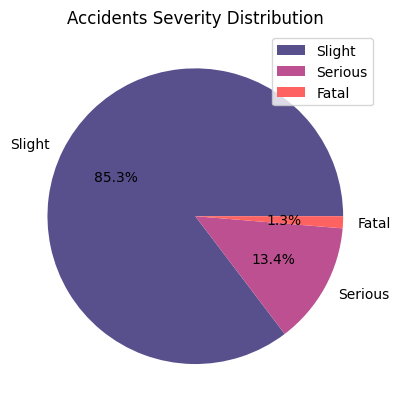

In [19]:
acci_severi = road_acci_df['Accident_Severity'].value_counts()

plt.pie(acci_severi,labels=acci_severi.index,autopct='%1.1f%%', colors=['#58508D','#BC5090','#FF6361'])
plt.title('Accidents Severity Distribution')
plt.legend()
plt.show()

<h2>Insight#8</h2>
<p>The detribution of accidents per accident severity are "SLIGHT: 563801", "SERIOUS: 88217", "FATALL: 8661"</p>

<H2>9. Where is the top 3 Districk area with a highest number of casualties recorded?</H2>

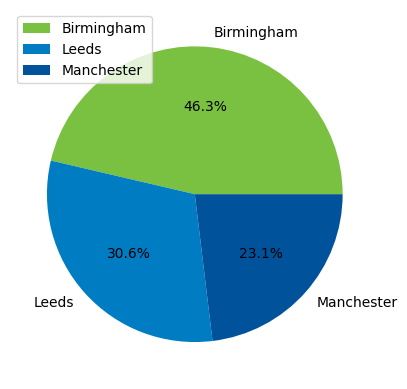

In [20]:
cslties_per_dis = road_acci_df.groupby(['District Area'])['Number_of_Casualties'].size().sort_values(ascending=False).head(3)

plt.pie(cslties_per_dis,labels=cslties_per_dis.index, autopct='%1.1f%%',colors=['#7AC142','#007CC3','#00529B'])
plt.legend()
plt.show()

<h2>Insight#9</h2>
<p>The three district area with a high number of casulties are "Birmingham: 13491", "Birmingham: 8898", "Manchester: 6720". </p>

<h2>10. What type of vehicle has the highest fatal Accident Severity? </h2>

In [21]:
import seaborn as sns

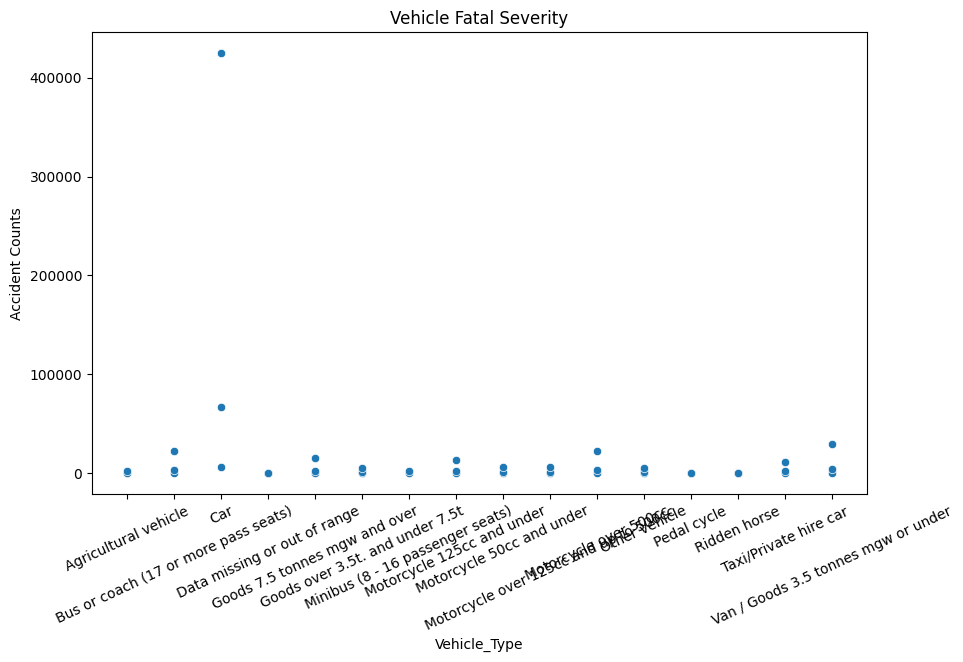

In [22]:
acci_sever = road_acci_df.groupby(['Vehicle_Type','Accident_Severity']).size().reset_index(name='Accident Counts')


plt.figure(figsize=(10,6))
sns.scatterplot(x='Vehicle_Type',y='Accident Counts',data=acci_sever)
plt.xticks(rotation=25)
plt.title('Vehicle Fatal Severity')
plt.show()

<h2>Insight#10</h2>
<p>It seems out of recorded accidents <b>CAR</b> has more FATAL case accident severity with a total of 6577.</p>

<h2>11. What is the average number of casualties recorded per vehicle types
    accidents.</h2>

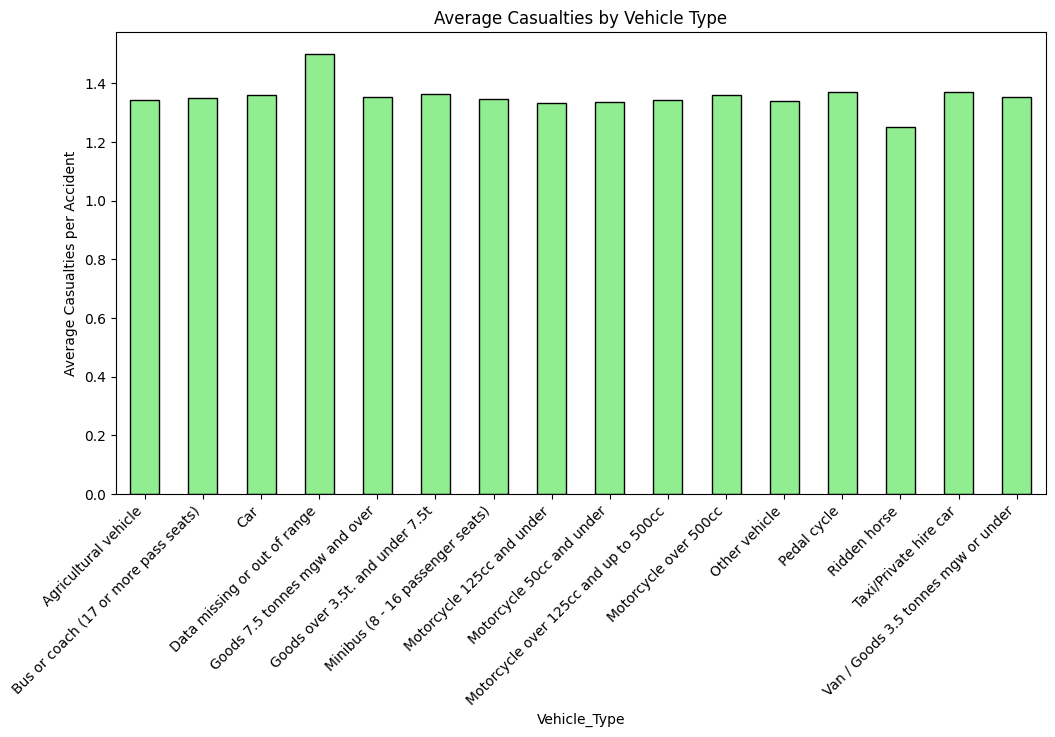

In [23]:
# avrg_car_caslt = road_acci_df[road_acci_df['Vehicle_Type'] == 'Car']['Number_of_Casualties'].mean()
# avrg_car_caslt

avrg_caslt_by_vehicle = road_acci_df.groupby("Vehicle_Type")["Number_of_Casualties"].mean()

avrg_caslt_by_vehicle.plot(kind="bar", color="lightgreen", edgecolor="black",figsize=(12,6))

plt.ylabel("Average Casualties per Accident")
plt.title("Average Casualties by Vehicle Type")
plt.xticks(rotation=45, ha="right")
plt.show()

<h2>Insight#11</h2>
<p>The average number of casualties recorded in car accidents is <b>1<b>.</p>

<h2>12. In what road surface conditions do car accidents usually happen?</h2>

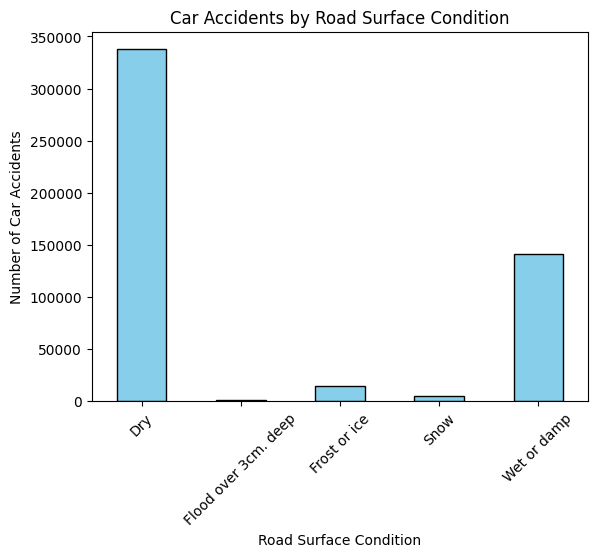

In [24]:
road_surfa =  road_acci_df.groupby(road_acci_df[road_acci_df['Vehicle_Type'] == 'Car']['Road_Surface_Conditions']).size()

road_surfa.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Car Accidents")
plt.title("Car Accidents by Road Surface Condition")
plt.xticks(rotation=45)
plt.show()

<h2>Insight#12</h2>
<p>According to the result 68% of car accidents usually happen on "DRY" road surface conditions.</p>

<h2>13. In which area usually do accidents happen?</h2>

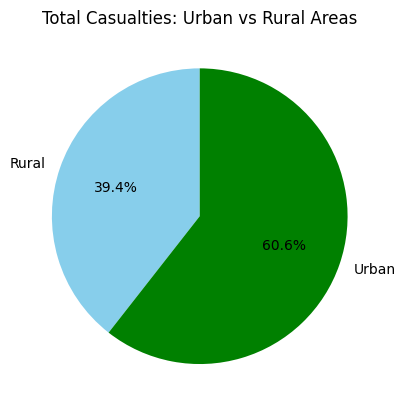

In [25]:
acci_area = (
    road_acci_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"]
    .sum().drop("Unallocated", errors="ignore") 
)
plt.pie(acci_area,
        labels=acci_area.index,      
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

<h2>Insight#13</h2>
<p>Base on the results 60.6% of accidents recorded usually happened in Urban Area.</p>

<h2>14.What types of vehicle has frequency accidents in Urban Area/ what severity and casualties in it?</h2>

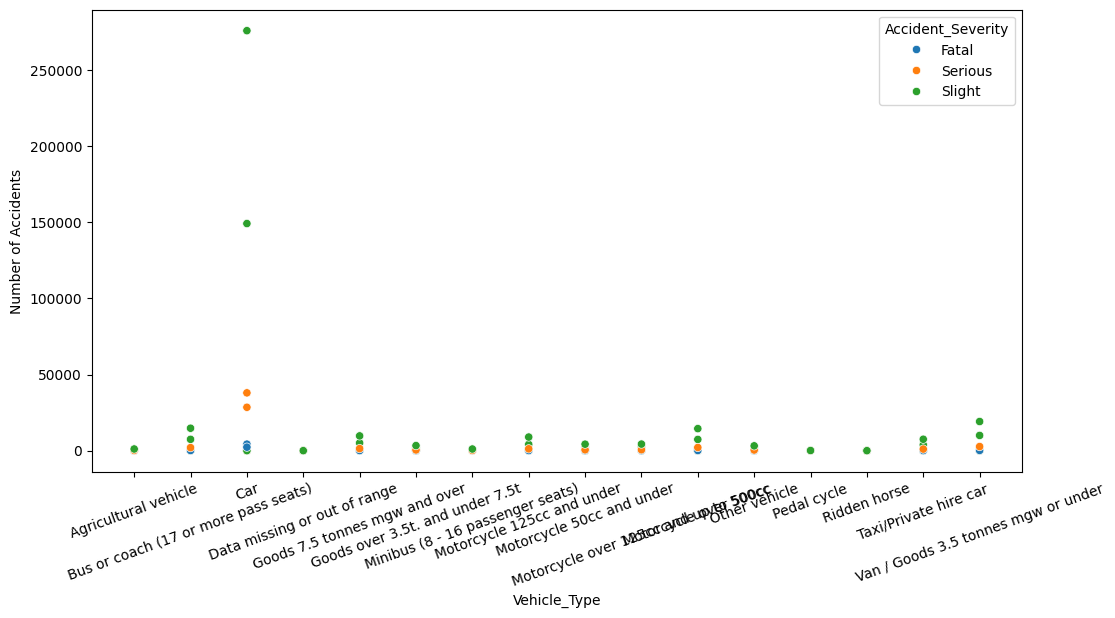

In [26]:
urban_acci = road_acci_df.groupby(['Urban_or_Rural_Area','Vehicle_Type','Accident_Severity']) .size().reset_index(name='Number of Accidents')


plt.figure(figsize=(12,6))
sns.scatterplot(
    x='Vehicle_Type',
    y='Number of Accidents',
    hue='Accident_Severity',
    data=urban_acci,
)
plt.xticks(rotation=20)
plt.show()

<h2>Insight#14</h2>
<p>It seems "Car" is also no.1 in road accidents recorded in urban area</p>

<h2>Inights#15</h2>
<p>It seems despite being a pedal cycle there is chance of accidents in urban area with a total number of 127 accidents.</p>

<h2>16. Which district area has recorded a more fatal accidents?</h2>

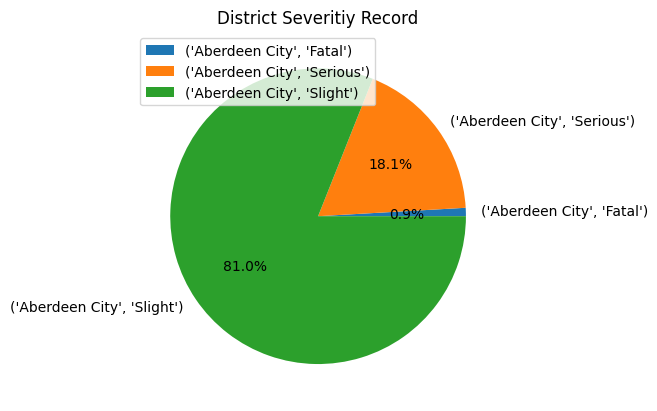

In [27]:
dsct_fatal = road_acci_df.groupby(['District Area','Accident_Severity'])['Number_of_Casualties'].size().head(3)

plt.pie(dsct_fatal,labels=dsct_fatal.index, autopct = '%1.1f%%')
plt.legend(loc = 'upper left')
plt.title('District Severitiy Record')
plt.show()

<h2>Inight#16</h2>
<p> It seem that <b>Aberdeenshire</b> has the most recorded fatal road accidents .</p>

In [28]:
road_acci_df['District Area'].mode()[0]

'Birmingham'

<h2>Insight#17</h2>
<p>Base in the previous reults despite 'Birmingham' being have more accidents record it's accidents is not most fatal.</p>

<h2>18. What are the average coordinates for each severity?</h2>

In [29]:
import folium
severity_means = road_acci_df.groupby('Accident_Severity')[['Latitude','Longitude']].mean()

# Create a base map (centered roughly in the middle of your data)
coor = folium.Map(location=[severity_means['Latitude'].mean(),
                         severity_means['Longitude'].mean()],
               zoom_start=6)


for severity, row in severity_means.iterrows():
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=severity
    ).add_to(coor)

coor


<h2>Insight#18</h2>
<p>Base on the data fatal road accidents have a slightly higher average latitude and lower average longitude compared  to serious and slight accidents.
</p>

<ul>
    <li>Correlation</li>
    <li>>= 0.5 = true</li>
</ul>
<h2>19. Is there a correlation between the number of vehicles involved and Number of Casualties?</h2>

In [30]:
cor_acci = road_acci_df['Number_of_Vehicles'].corr(road_acci_df['Number_of_Casualties'])
cor_acci

np.float64(0.22888886126927557)

<h2>Insight#19</h2>
<p>there a weak correlation between the number of vehicles involved and Number of Casualties</p>

<h2>20.  Is There a correlation between number of vehicles and Casualties Severity?</h2>

In [31]:
road_acci_df['Accident_Severity'].unique()

['Serious', 'Slight', 'Fatal']
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [32]:
road_acci_df[road_acci_df['Accident_Severity'] == 'Serious']['Number_of_Vehicles']

0         2
1         2
2         3
3         4
5         3
         ..
660629    2
660645    1
660672    2
660677    2
660678    1
Name: Number_of_Vehicles, Length: 88217, dtype: int64

In [33]:
road_acci_df[road_acci_df['Accident_Severity'] == 'Slight']['Number_of_Vehicles']

4         2
8         2
9         2
13        2
14        1
         ..
660671    1
660673    2
660674    1
660675    1
660676    3
Name: Number_of_Vehicles, Length: 563801, dtype: int64

In [34]:
road_acci_df[road_acci_df['Accident_Severity'] == 'Fatal']['Number_of_Vehicles']

7         2
11        2
20        1
21        1
717       2
         ..
660470    1
660519    1
660565    1
660581    1
660627    1
Name: Number_of_Vehicles, Length: 8661, dtype: int64

In [35]:
f_oneway(road_acci_df[road_acci_df['Accident_Severity'] == 'Serious']['Number_of_Vehicles'],road_acci_df[road_acci_df['Accident_Severity'] == 'Slight']['Number_of_Vehicles'],road_acci_df[road_acci_df['Accident_Severity'] == 'Fatal']['Number_of_Vehicles'])

F_onewayResult(statistic=np.float64(2383.6601993258646), pvalue=np.float64(0.0))

<h2>Insight#20</h2>
<p>I think there is none correlation between the two.</p>

<h2>CREATING NEW COLUMN FOR YEAR,MONTH,DAY,DAYOFWEEK</h2>

In [36]:
#CREATING NEW COLUMN FOR YEAR,MONTH,DAY,DAYOFWEEK
road_acci_df['Accident Date'] = (
    road_acci_df['Accident Date']
    .astype(str)               
    .str.replace('/', '-', regex=False) 
    .str.strip()                   
)
road_acci_df['Accident Date'].replace('nan', pd.NA, inplace=True)

road_acci_df['Accident Date'] = pd.to_datetime(
    road_acci_df['Accident Date'], 
    dayfirst=True, 
    errors='coerce'
)
road_acci_df['Year'] = road_acci_df['Accident Date'].dt.year
road_acci_df['Month'] =  road_acci_df['Accident Date'].dt.month
road_acci_df['Day'] =  road_acci_df['Accident Date'].dt.day
road_acci_df['DayOfWeek'] =  road_acci_df['Accident Date'].dt.dayofweek

<h2>21. Which month records the highest number of accidents?</h2>

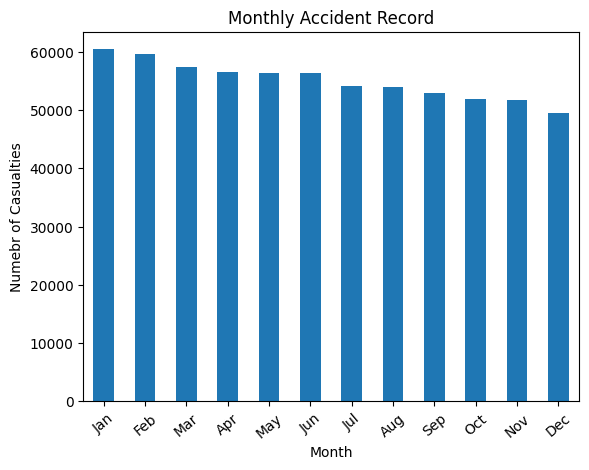

In [37]:
month_counts = road_acci_df["Month"].value_counts()
month_counts.plot(kind='bar',title='Monthly Accident Record')
plt.xlabel('Month')
plt.ylabel('Numebr of Casualties')
plt.xticks(range(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=40)
plt.show()

<h2>Insight#21</h2>
<p>The month with a high records of number of accidents is (11)"November" with total numbers of 419912</p>

<h2>22. Which day of week record highest number of road acccidents</h2>

In [38]:
new_df = road_acci_df[road_acci_df['DayOfWeek'] != 5]

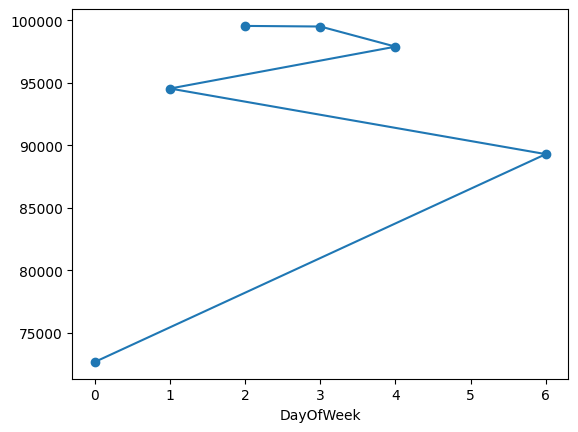

In [39]:
day_weeks = new_df['DayOfWeek'].value_counts()
day_weeks.plot(marker='o')
plt.show()

<h2>Inight#22</h2>
<p>Base on the data in some reasons every (5)'SATURDAY' the number of accidents increases.</p>

<h2>23. In which year do road accidents happened the most?</h2>

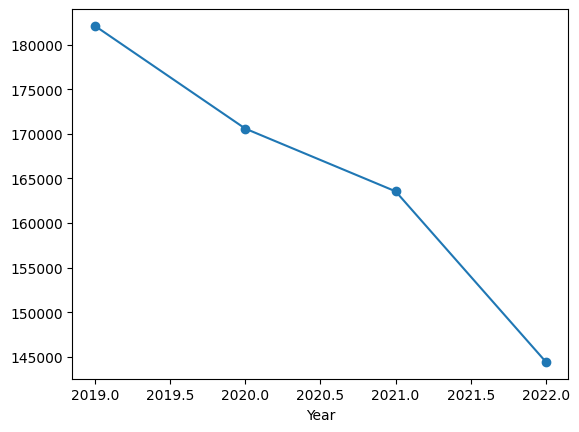

In [40]:
year_acci = road_acci_df['Year'].value_counts()
year_acci.plot(marker='o')
plt.show()


<h2>Insight#23</h2>
<p>Base on the data 71% of road accidents recorded in 2019.</p>

<h2>24. In which moth accident happen the most per detrict area?</h2>

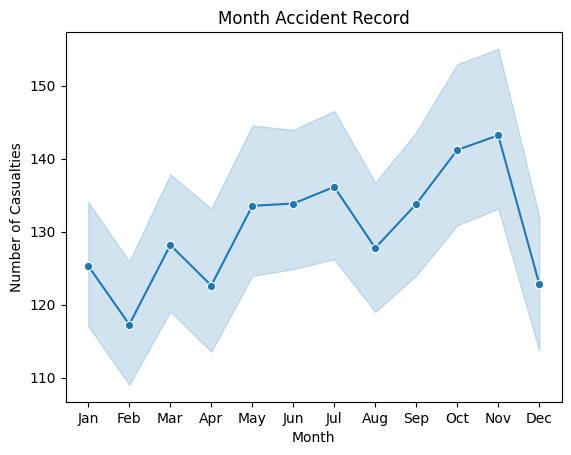

In [41]:
month_acci = road_acci_df.groupby(['Month','District Area'])['Number_of_Casualties'].size().reset_index(name='Number of Casualties')

month_name = {
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
}
month_acci['Month'] = month_acci['Month'].map(month_name)

sns.lineplot(data=month_acci,  x='Month', y='Number of Casualties',marker='o')
plt.title('Month Accident Record')
plt.show()


<h2>Insight#24</h2>
<p>Base on the data most of accident numbers vary significantly between district area .</p>

<h2>Insight#25</h2>
<p>Therefore some districts like Alnwick, consistently report a lower accident numbers accross all months.</p>

In [42]:
road_acci_df['District Area'].value_counts().head(6)

District Area
Birmingham     13491
Leeds           8898
Manchester      6720
Bradford        6212
Sheffield       5710
Westminster     5706
Name: count, dtype: int64

In [43]:
birmingham_df = road_acci_df[road_acci_df["District Area"] == "Birmingham"]
leeds_df = road_acci_df[road_acci_df["District Area"] == "Leeds"]
manchester_df = road_acci_df[road_acci_df["District Area"] == "Manchester"]
bradford_df = road_acci_df[road_acci_df["District Area"] == "Bradford"]
sheffield_df = road_acci_df[road_acci_df["District Area"] == "Sheffield"]
westminster_df = road_acci_df[road_acci_df["District Area"] == "Westminster"]

<h1>Insight#26 || Birmingham City Insight Visualization</h1>
<ol>
    <li>Monthly Road Accidents by year</li>
    <li>Accidents per Year</li>
    <li>Accidents per Month</li>
    <li>Accidents per Day</li>
    <li>Casualties in Rural vs Urban Area</li>
    <li>Map Location using folium(Heatmap)</li>
</ol>


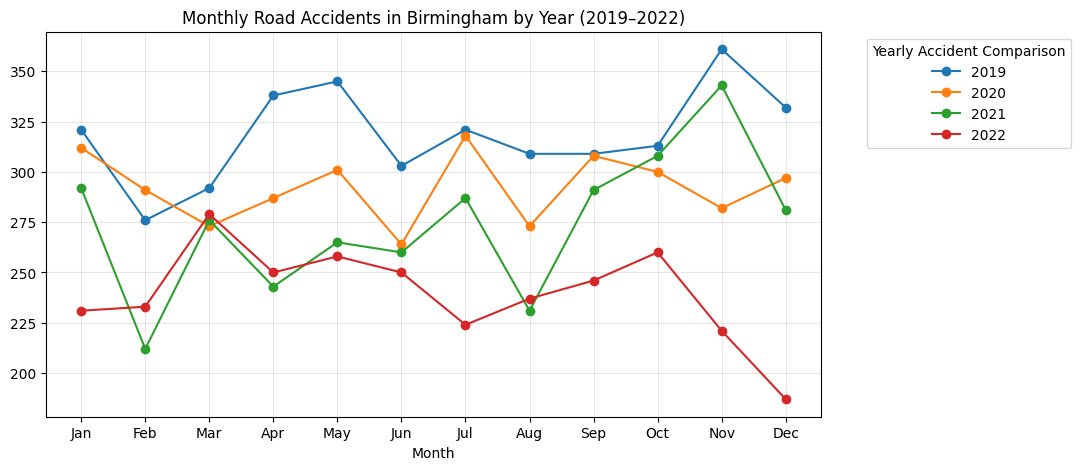

In [44]:
monthly_data = birmingham_df.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Birmingham by Year (2019–2022)'
)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

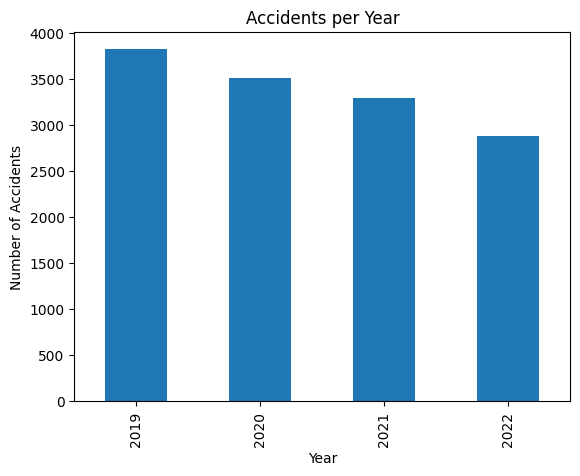

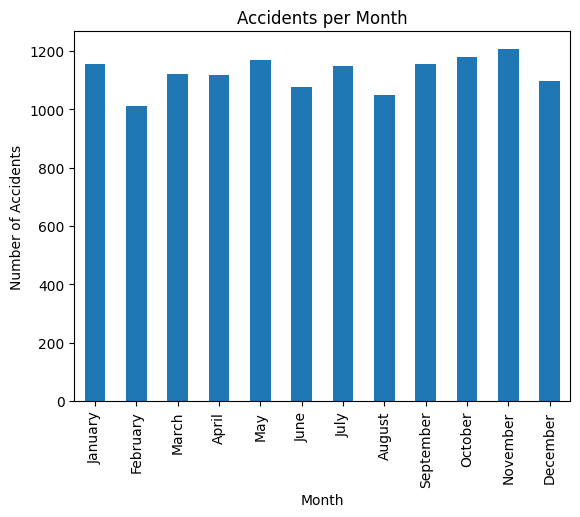

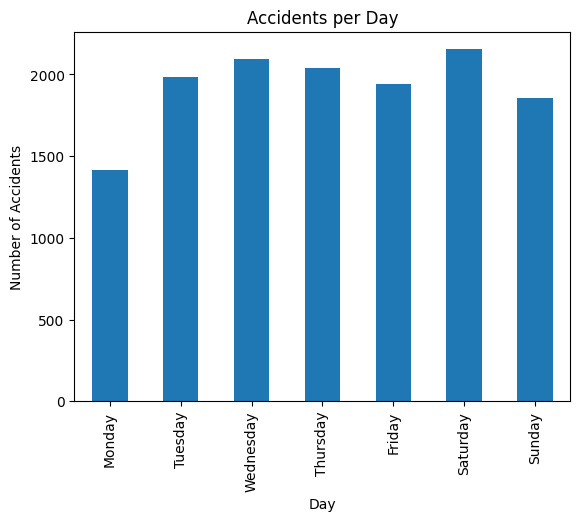

In [45]:
accidents_per_year = birmingham_df['Year'].value_counts().sort_index()
accidents_per_month = birmingham_df['Month'].value_counts().sort_index()
accidents_per_day = birmingham_df['DayOfWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

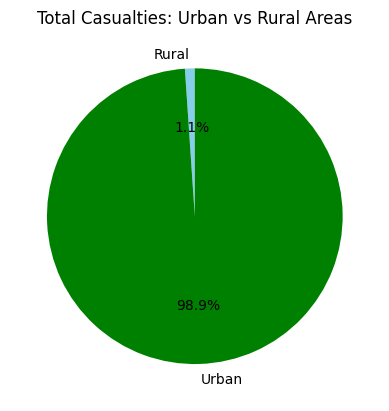

In [46]:
acci_area = (
    birmingham_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"]
    .sum().drop("Unallocated", errors="ignore") 
)
plt.pie(acci_area,
        labels=acci_area.index,      
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

In [47]:
import folium 
from folium.plugins import HeatMap
birmingham_locations = list(zip(birmingham_df["Latitude"],birmingham_df["Longitude"]))
birmingham_map = folium.Map(location=[birmingham_df["Latitude"].mean(),birmingham_df["Longitude"].mean()], zoom_start=10)
HeatMap(birmingham_locations).add_to(birmingham_map)
birmingham_map.save('birmingham_map.html')
birmingham_map

<h1>Insight#27 || Leeds City Insight Visualization</h1>
<ol>
    <li>Monthly Road Accidents by year</li>
    <li>Accidents per Year</li>
    <li>Accidents per Month</li>
    <li>Accidents per Day</li>
    <li>Casualties in Rural vs Urban Area</li>
    <li>Map Location using folium(Heatmap)</li>
</ol>


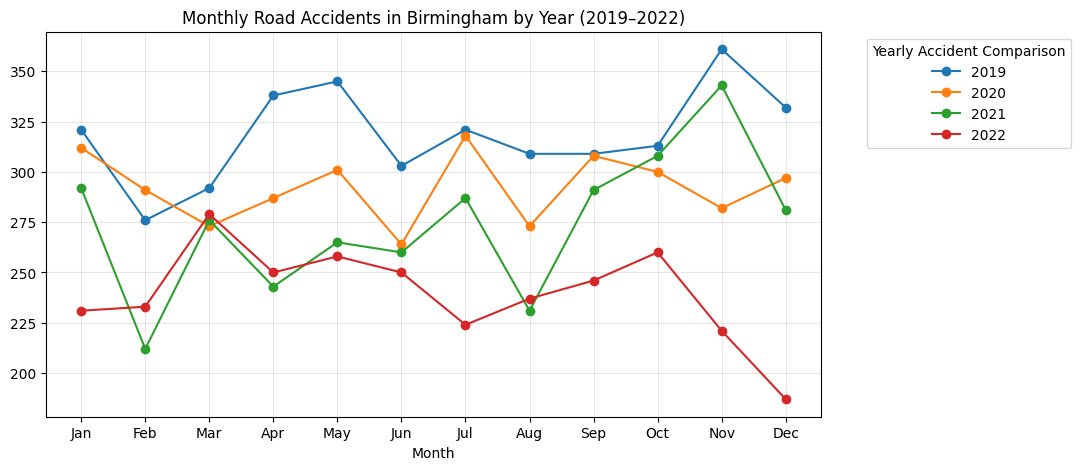

In [48]:
monthly_data = birmingham_df.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Birmingham by Year (2019–2022)'
)

plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


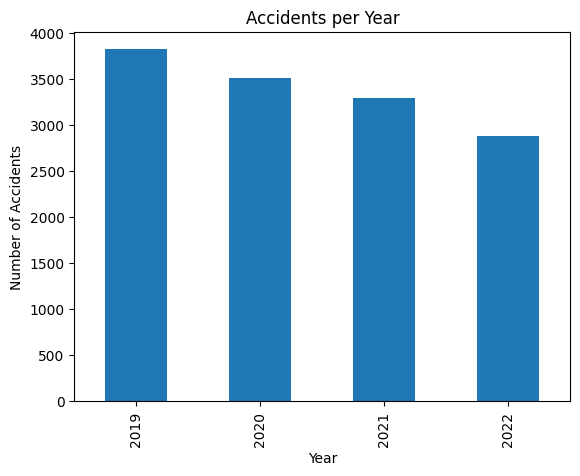

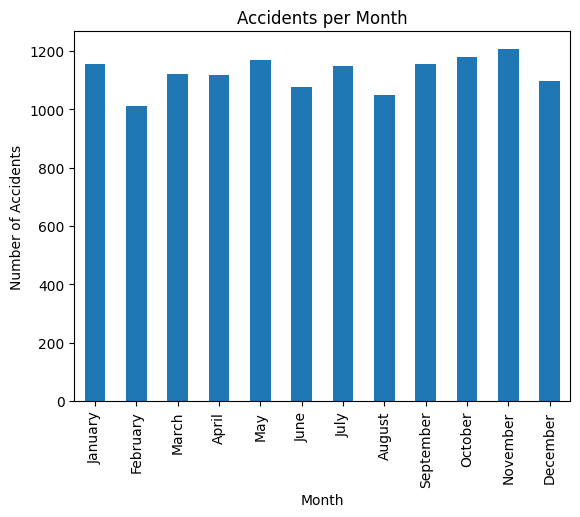

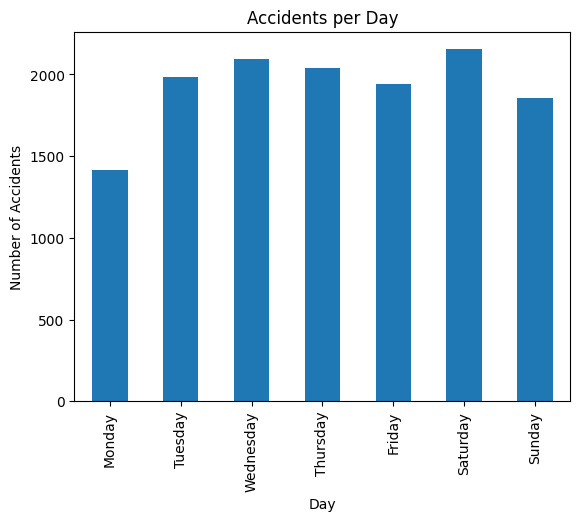

In [49]:
accidents_per_year = birmingham_df['Year'].value_counts().sort_index()
accidents_per_month = birmingham_df['Month'].value_counts().sort_index()
accidents_per_day = birmingham_df['DayOfWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

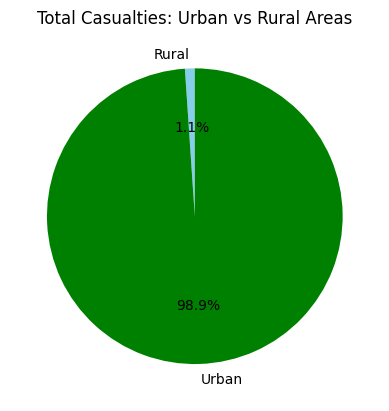

In [50]:
acci_area = (birmingham_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum().drop("Unallocated", errors="ignore") )
plt.pie(acci_area,labels=acci_area.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

In [51]:
birmingham_locations = list(zip(birmingham_df["Latitude"],birmingham_df["Longitude"]))
birmingham_map = folium.Map(location=[birmingham_df["Latitude"].mean(),birmingham_df["Longitude"].mean()], zoom_start=10)
HeatMap(birmingham_locations).add_to(birmingham_map)
birmingham_map.save('birmingham_map.html')
birmingham_map

<h1>Insight#26 || Leeds City Insight Visualization</h1>
<ol>
    <li>Monthly Road Accidents by year</li>
    <li>Accidents per Year</li>
    <li>Accidents per Month</li>
    <li>Accidents per Day</li>
    <li>Casualties in Rural vs Urban Area</li>
    <li>Map Location using folium(Heatmap)</li>
</ol>

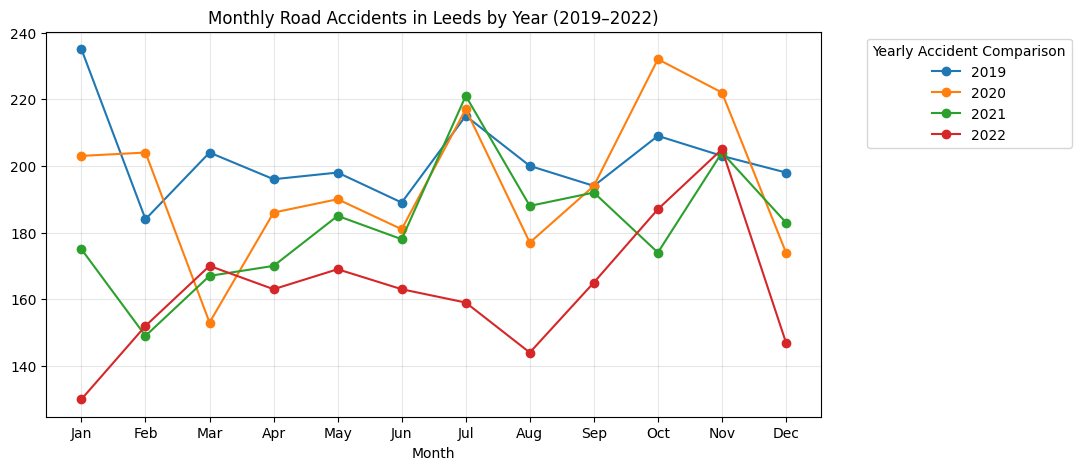

In [52]:
monthly_data = leeds_df.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Leeds by Year (2019–2022)'
)

plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()



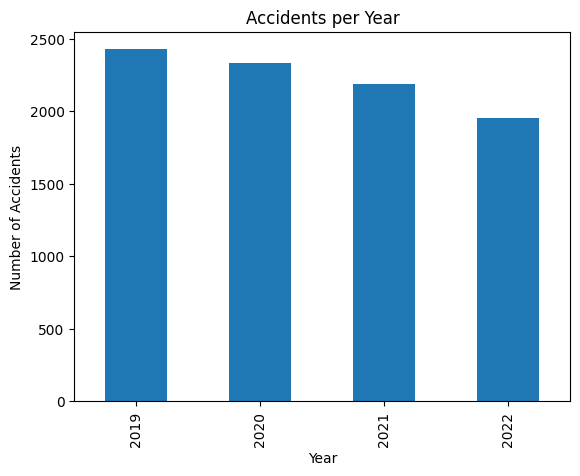

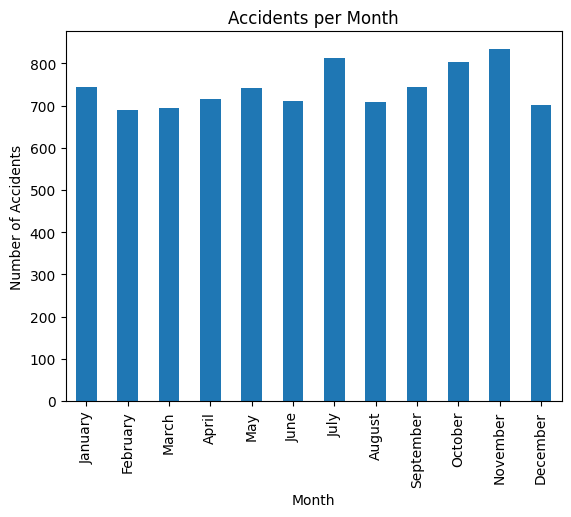

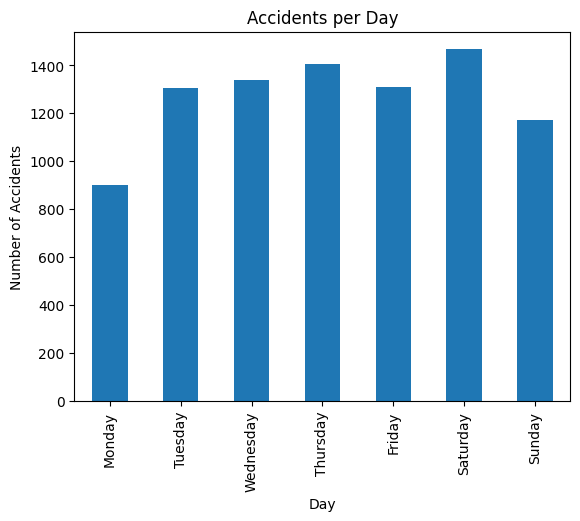

In [53]:
accidents_per_year = leeds_df['Year'].value_counts().sort_index()
accidents_per_month = leeds_df['Month'].value_counts().sort_index()
accidents_per_day = leeds_df['DayOfWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

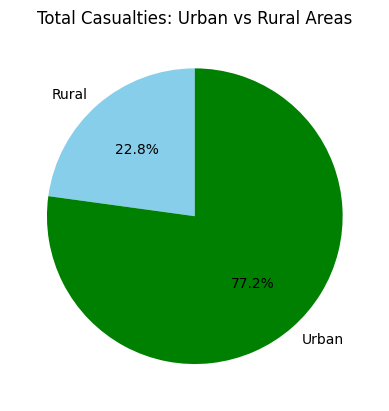

In [54]:
acci_area = (leeds_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum().drop("Unallocated", errors="ignore") )
plt.pie(acci_area,labels=acci_area.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

In [55]:
leeds_locations = list(zip(leeds_df["Latitude"],leeds_df["Longitude"]))
leeds_map = folium.Map(location=[leeds_df["Latitude"].mean(),leeds_df["Longitude"].mean()], zoom_start=10)
HeatMap(leeds_locations).add_to(leeds_map)
leeds_map.save('leeds_map.html')
leeds_map

<h1>Insight#28 || Manchester City Insight Visualization</h1>
<ol>
    <li>Monthly Road Accidents by year</li>
    <li>Accidents per Year</li>
    <li>Accidents per Month</li>
    <li>Accidents per Day</li>
    <li>Casualties in Rural vs Urban Area</li>
    <li>Map Location using folium(Heatmap)</li>
</ol>

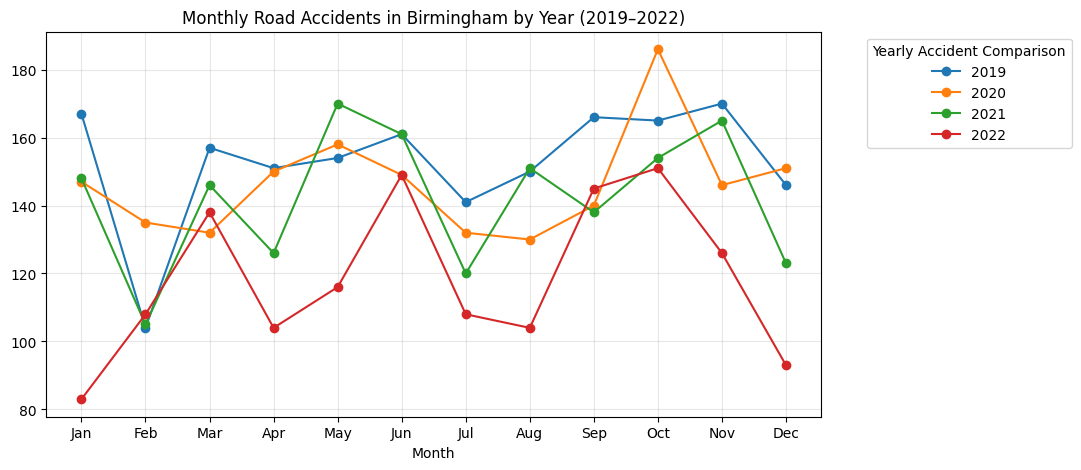

In [56]:
monthly_data = manchester_df.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Birmingham by Year (2019–2022)'
)

plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

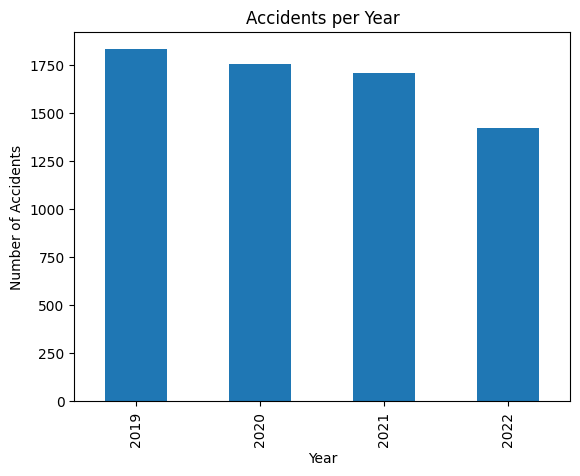

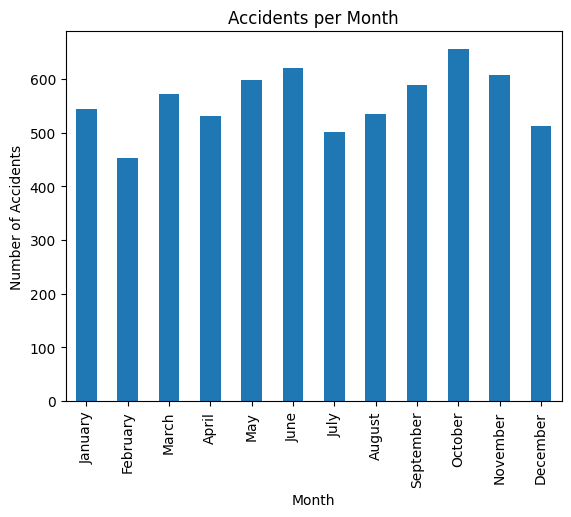

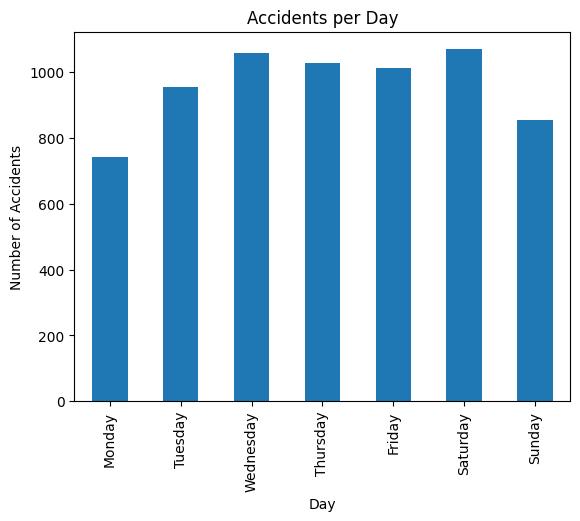

In [57]:
accidents_per_year = manchester_df['Year'].value_counts().sort_index()
accidents_per_month = manchester_df['Month'].value_counts().sort_index()
accidents_per_day = manchester_df['DayOfWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

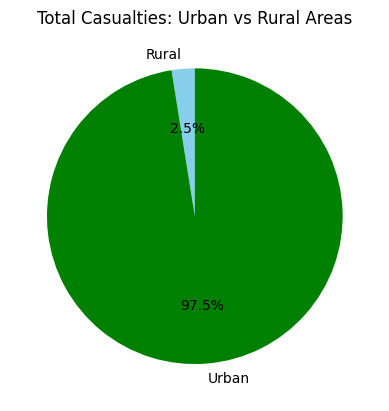

In [58]:
acci_area = (manchester_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum().drop("Unallocated", errors="ignore") )
plt.pie(acci_area,labels=acci_area.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

In [59]:
manchester_locations = list(zip(manchester_df["Latitude"],manchester_df["Longitude"]))
manchester_map = folium.Map(location=[manchester_df["Latitude"].mean(),manchester_df["Longitude"].mean()], zoom_start=10)
HeatMap(manchester_locations).add_to(manchester_map)
manchester_map.save('manchester_map.html')
manchester_map

<h1>Insight#29 || Bradford City Insight Visualization</h1>
<ol>
    <li>Monthly Road Accidents by year</li>
    <li>Accidents per Year</li>
    <li>Accidents per Month</li>
    <li>Accidents per Day</li>
    <li>Casualties in Rural vs Urban Area</li>
    <li>Map Location using folium(Heatmap)</li>
</ol>

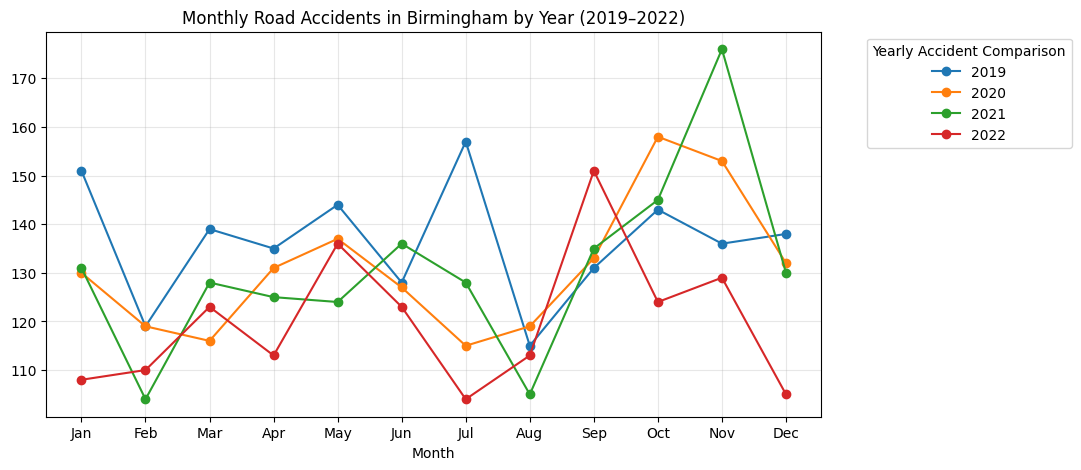

In [60]:
monthly_data = bradford_df.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Birmingham by Year (2019–2022)'
)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

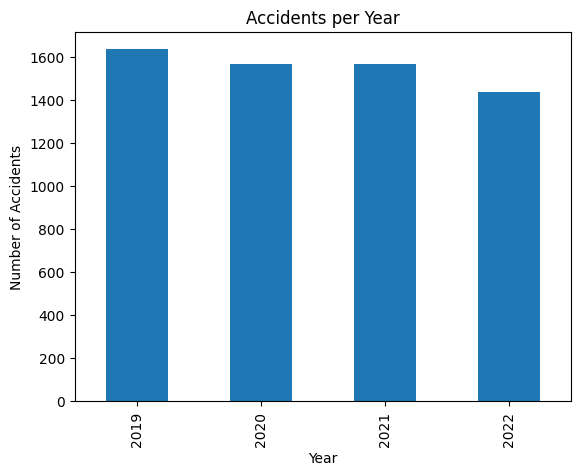

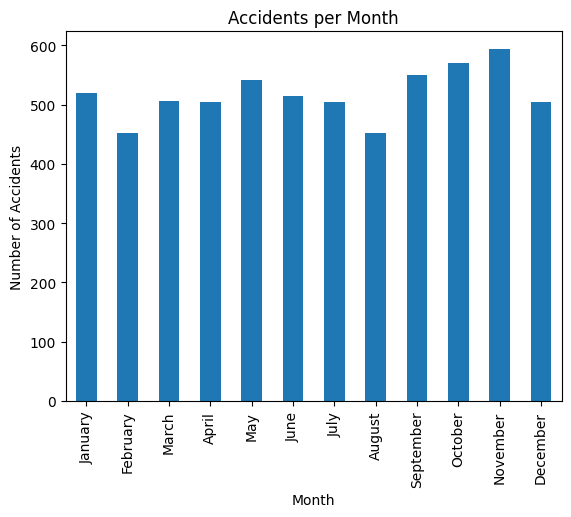

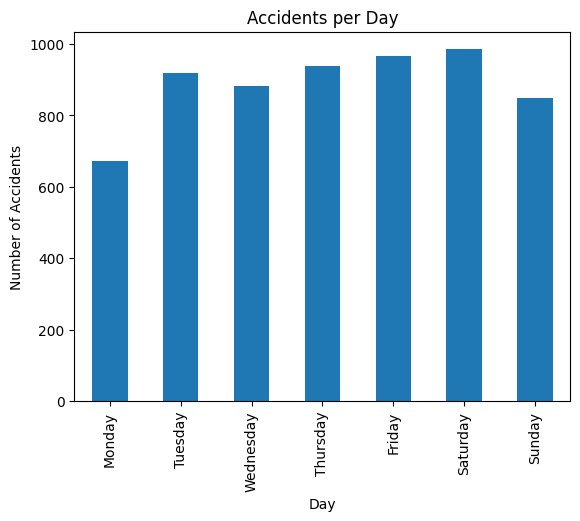

In [61]:
accidents_per_year = bradford_df['Year'].value_counts().sort_index()
accidents_per_month = bradford_df['Month'].value_counts().sort_index()
accidents_per_day = bradford_df['DayOfWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

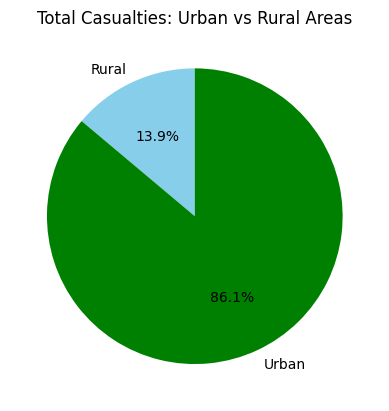

In [62]:
acci_area = (bradford_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum().drop("Unallocated", errors="ignore") )
plt.pie(acci_area,labels=acci_area.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

In [63]:
bradford_locations = list(zip(bradford_df["Latitude"],bradford_df["Longitude"]))
bradford_map = folium.Map(location=[bradford_df["Latitude"].mean(),bradford_df["Longitude"].mean()], zoom_start=10)
HeatMap(bradford_locations).add_to(bradford_map)
bradford_map.save('bradford_map.html')
bradford_map

<h1>Insight#30 || Sheffield City Insight Visualization</h1>
<ol>
    <li>Monthly Road Accidents by year</li>
    <li>Accidents per Year</li>
    <li>Accidents per Month</li>
    <li>Accidents per Day</li>
    <li>Casualties in Rural vs Urban Area</li>
    <li>Map Location using folium(Heatmap)</li>
</ol>

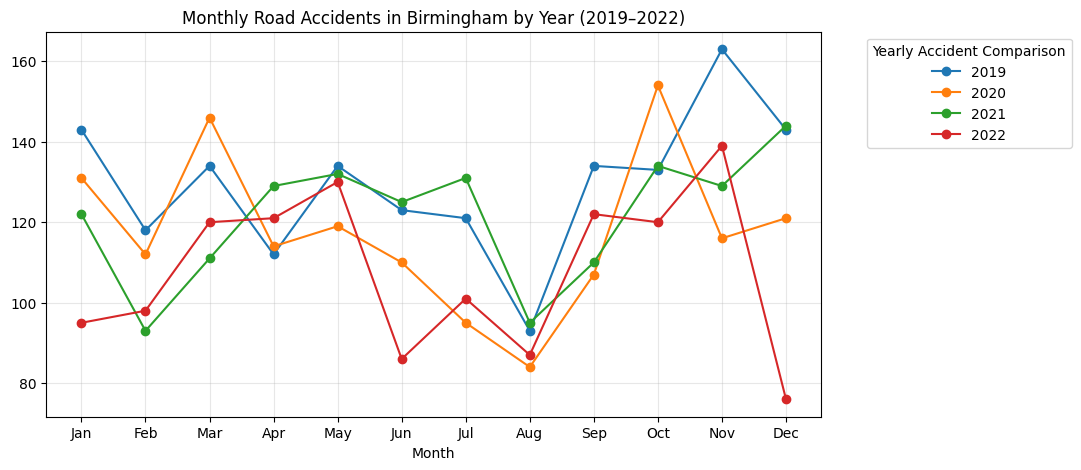

In [64]:
monthly_data = sheffield_df.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Birmingham by Year (2019–2022)'
)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

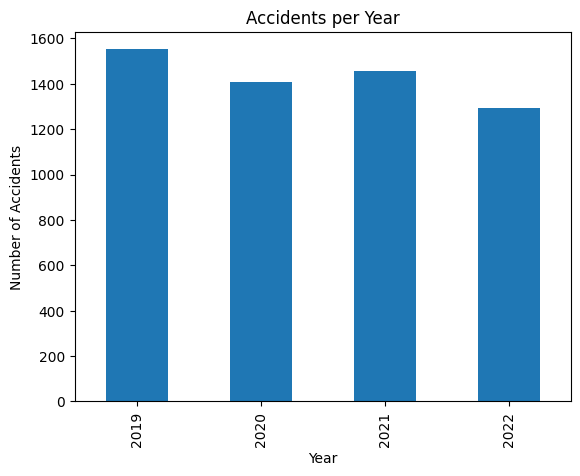

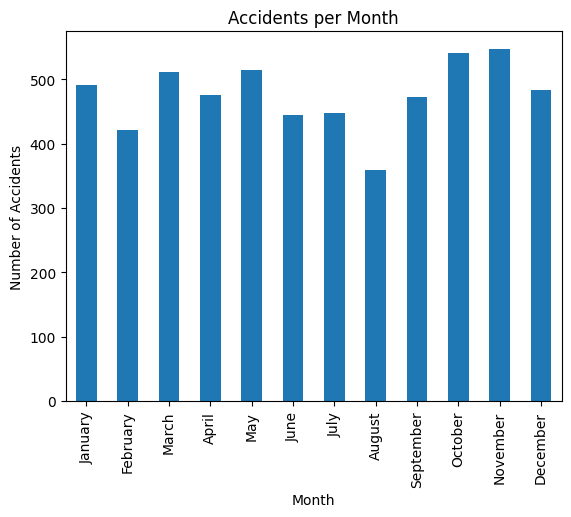

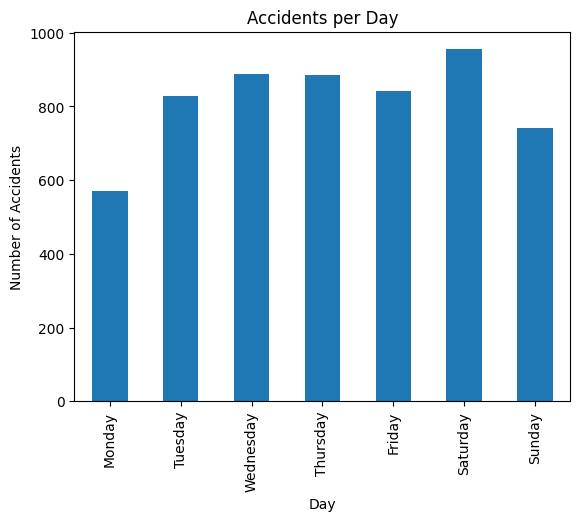

In [65]:
accidents_per_year = sheffield_df['Year'].value_counts().sort_index()
accidents_per_month = sheffield_df['Month'].value_counts().sort_index()
accidents_per_day = sheffield_df['DayOfWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

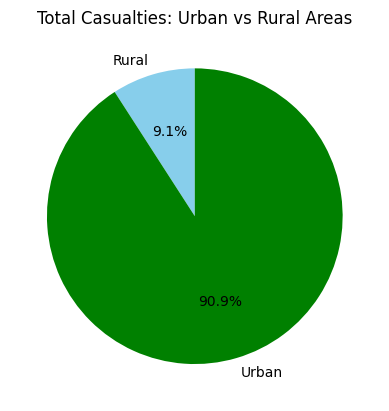

In [66]:
acci_area = (sheffield_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum().drop("Unallocated", errors="ignore") )
plt.pie(acci_area,labels=acci_area.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

In [67]:
sheffield_locations = list(zip(sheffield_df["Latitude"],sheffield_df["Longitude"]))
sheffield_map = folium.Map(location=[sheffield_df["Latitude"].mean(),sheffield_df["Longitude"].mean()], zoom_start=10)
HeatMap(sheffield_locations).add_to(sheffield_map)
sheffield_map.save('sheffield_map.html')
sheffield_map

<h1>Insight#31 || Westminster City Insight Visualization</h1>
<ol>
    <li>Monthly Road Accidents by year</li>
    <li>Accidents per Year</li>
    <li>Accidents per Month</li>
    <li>Accidents per Day</li>
    <li>Casualties in Rural vs Urban Area</li>
    <li>Map Location using folium(Heatmap)</li>
</ol>

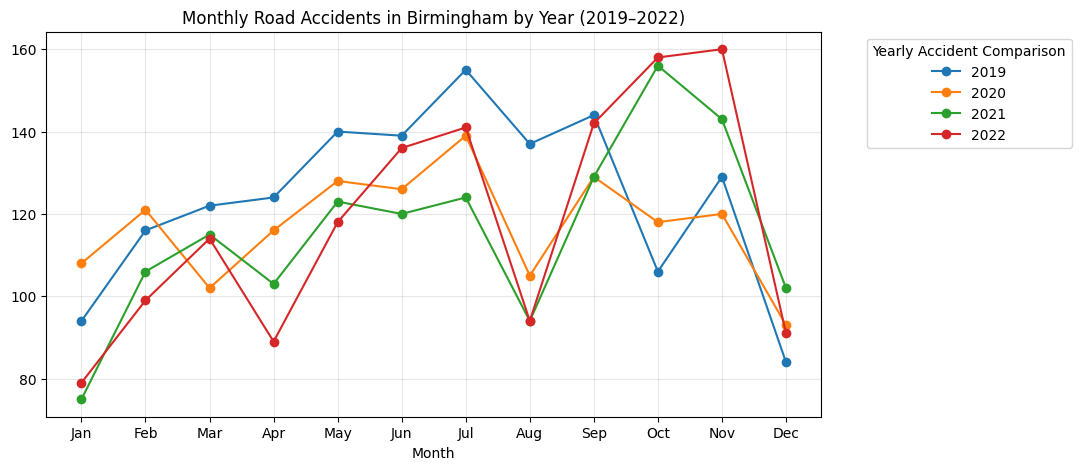

In [68]:
monthly_data = westminster_df.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Birmingham by Year (2019–2022)'
)

plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

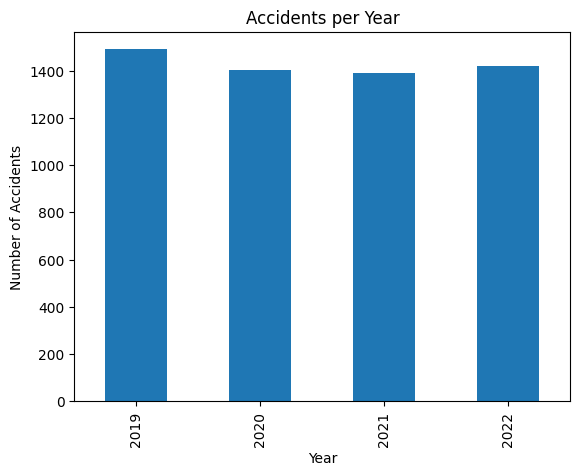

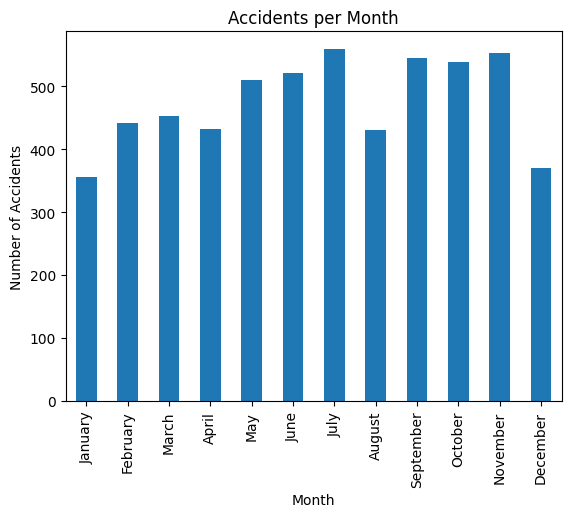

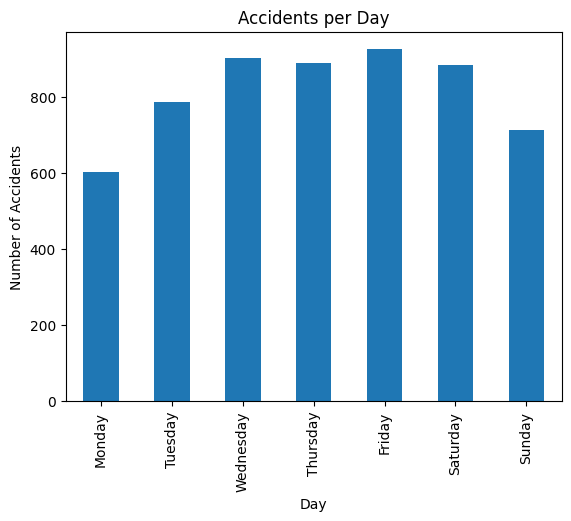

In [69]:
accidents_per_year = westminster_df['Year'].value_counts().sort_index()
accidents_per_month = westminster_df['Month'].value_counts().sort_index()
accidents_per_day = westminster_df['DayOfWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June', 7: 'July', 8: 'August',9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

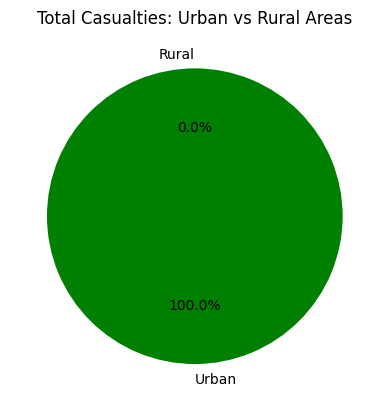

In [70]:
acci_area = (westminster_df.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum().drop("Unallocated", errors="ignore") )
plt.pie(acci_area,labels=acci_area.index,autopct='%1.1f%%',startangle=90,colors=['skyblue','green']) 

plt.title("Total Casualties: Urban vs Rural Areas")
plt.show()

In [71]:
westminster_locations = list(zip(westminster_df["Latitude"],westminster_df["Longitude"]))
westminster_map = folium.Map(location=[westminster_df["Latitude"].mean(),westminster_df["Longitude"].mean()], zoom_start=10)
HeatMap(westminster_locations).add_to(westminster_map)
westminster_map.save('westminster_map.html')
westminster_map